<a href="https://colab.research.google.com/github/Bhavi663/My-Website/blob/main/DSTW_TinyML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow and other necessary libraries
!pip install tensorflow matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1 range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for the model
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 33ms/step - accuracy: 0.9091 - loss: 0.2965 - val_accuracy: 0.9803 - val_loss: 0.0580
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9843 - loss: 0.0518 - val_accuracy: 0.9788 - val_loss: 0.0635
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 27ms/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9850 - val_loss: 0.0452
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9940 - loss: 0.0198 - val_accuracy: 0.9841 - val_loss: 0.0477
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.9870 - val_loss: 0.0405


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


313/313 - 2s - 6ms/step - accuracy: 0.9870 - loss: 0.0405
Test accuracy: 0.99


In [6]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpif7n1fn7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140045436555664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140045436559312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140045436558928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140045436558160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140045436559888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140045436559504: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [8]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='mnist_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test with an example from the dataset
input_data = np.expand_dims(x_test[0], axis=0).astype(np.float32)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)

print(f"Predicted Class: {predicted_class}, Actual Class: {y_test[0]}")


Predicted Class: 7, Actual Class: 7


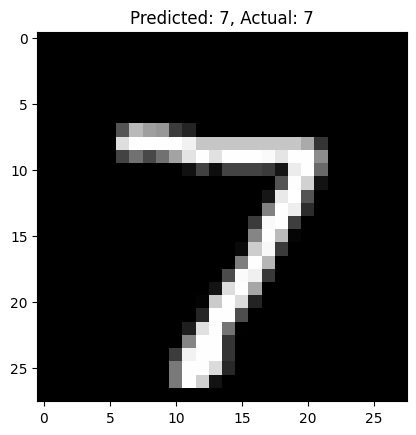

In [9]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {y_test[0]}")
plt.show()
